# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [0]:
!pip install google_images_download

In [10]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3. pkls4116_inline.png
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://www.nwf.org/-/media/NEW-WEBSITE/Programs/Garden-for-Wildlife/amphibian_bronze-frog_Julia-Bartosh_400x267.ashx
Completed Image ====> 5. amphibian_bronze-frog_julia-bartosh_400x267.ash

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [11]:
# Imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps  # https://pillow.readthedocs.io/en/stable/
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

Using TensorFlow backend.


In [13]:
absolute_image_paths

{'animal pond': ['/content/downloads/animal pond/1. pondanimals.gif',
  '/content/downloads/animal pond/2. hqdefault.jpg',
  '/content/downloads/animal pond/3. pkls4116_inline.png',
  '/content/downloads/animal pond/4. alligator-animal-on-pond.jpg',
  '/content/downloads/animal pond/5. amphibian_bronze-frog_julia-bartosh_400x267.ash']}

In [0]:
# Resize all images to 224x224 pixels
image_path_list = absolute_image_paths['animal pond']

def resize_image(filename, new_width=256, new_height=256):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
  resize_image(path, 224, 224)

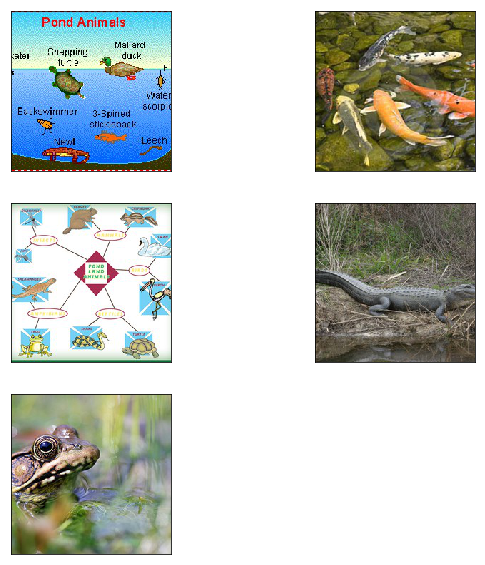

In [19]:
# Show images
def show_images(image_path_list):
  plt.figure(figsize=(10,10));
  for i, image_path in enumerate(image_path_list):
    plt.subplot(3,2, i+1)
    plt.imshow(np.asarray(Image.open(image_path)))
#     plt.title(image_path)
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
  plt.show()

show_images(image_path_list)

In [0]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def interpret(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return results

In [21]:
all_predictions = []
for i, image_path in enumerate(image_path_list):
  results = interpret(process_img_path(image_path))
  all_predictions.append(results)
  print(results)

Instructions for updating:
Colocations handled automatically by placer.
40960/35363 [==================================] - 0s 1us/step
[('n06359193', 'web_site', 0.8918389), ('n04404412', 'television', 0.08547714), ('n04152593', 'screen', 0.006043785)]
[('n01443537', 'goldfish', 0.57714343), ('n02536864', 'coho', 0.3193861), ('n01630670', 'common_newt', 0.020654997)]
[('n04243546', 'slot', 0.9574489), ('n04476259', 'tray', 0.014238177), ('n03908618', 'pencil_box', 0.007384028)]
[('n01698640', 'American_alligator', 0.59087384), ('n01737021', 'water_snake', 0.13598265), ('n01697457', 'African_crocodile', 0.07479092)]
[('n01641577', 'bullfrog', 0.66036487), ('n01644900', 'tailed_frog', 0.3108625), ('n01630670', 'common_newt', 0.012726643)]


ResNet50 thinks there's a frog in here!

 66.04% chance of bullfrog 
 31.09% chance of tailed_frog 
  1.27% chance of common_newt 


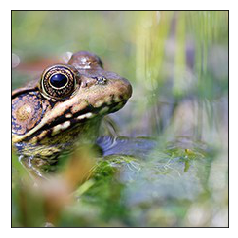

In [42]:
for path, prediction in zip(image_path_list, all_predictions):
  
  # If any of the predictions for an image include the word 'frog', 
  # print out all the predictions as well as the image.
  if any(['frog' in x[1] for x in prediction]):
    
    print("ResNet50 thinks there's a frog in here!")
    print()
    for _, animal, prob in prediction:
      print(f'{prob*100:6.2f}% chance of {animal} ')

    plt.subplot()
    plt.imshow(np.asarray(Image.open(path)))
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
    plt.show()
    print()

ResNet50 thinks there's a fish in here!

 57.71% chance of goldfish 
 31.94% chance of coho 
  2.07% chance of common_newt 


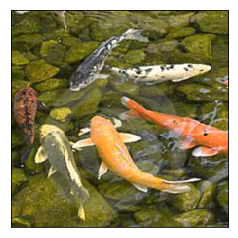

In [43]:
for path, prediction in zip(image_path_list, all_predictions):
  
  # If any of the predictions for an image include the word 'frog', 
  # print out all the predictions as well as the image.
  if any(['fish' in x[1] for x in prediction]):
    
    print("ResNet50 thinks there's a fish in here!")
    print()
    for _, animal, prob in prediction:
      print(f'{prob*100:6.2f}% chance of {animal} ')

    plt.subplot()
    plt.imshow(np.asarray(Image.open(path)))
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
    plt.show()
    print()